In [1]:
import numpy as np
import mpmath as mp
import math
import matplotlib as mpl
import scipy.special as ss
from matplotlib import pyplot as plt
import time

In [2]:
#Parametros generales
h=4.13566773e-15
hb=h/(2*np.pi)
kb=8.617333262e-5
m=3.817545e-26
w=2*np.pi*100
N0=1e7
T0=5e-5

In [3]:
def f(x):
    F =-((kb**3)*(T0**3))/((hb**3)*(w**3))*mp.polylog(3,-mp.exp(x))-N0
    return F
def df(x):
    der =-((kb**3)*(T0**3))/((hb**3)*(w**3))*mp.polylog(2,-mp.exp(x))
    return der
def b(x):
    F =((kb**3)*(T0**3))/((hb**3)*(w**3))*mp.polylog(3,mp.exp(x))-N0
    return F
def db(x):
    der =((kb**3)*(T0**3))/((hb**3)*(w**3))*mp.polylog(2,mp.exp(x))
    return der

In [4]:
def nr_1var(f,df,x1,x2,dx,tol,MAX,n,t):
    while x1<x2:
        f_n=f(x1)
        f_np1=f(x1+dx)
        bracket=f_n*f_np1
        if bracket<0:
            x_n=x1
            step=1
            while True:
                x_nm1=x_n
                x_np1=x_n-(f(x_n)/df(x_n))
                x_n=x_np1
                step+=1
                if abs(x_n-x_nm1)<tol or step==MAX:
                    break
            return float(mp.nstr(x_n,20))
        x1=x1+dx

In [5]:
evap_cool_b={'N':[],'T':[],'E':[],'Mu':[],'Q':[],'Nf':[],'Tf':[]}
evap_cool_f={'N':[],'T':[],'E':[],'Mu':[],'Q':[],'Nf':[],'Tf':[]}
evap_cool_mb={'N':[],'T':[],'Q':[],'Nf':[],'Tf':[]}

In [6]:
#bosones
start1 = time.time()
print('Inicio')
n1=nr_1var(b,db,-12,-11.5,0.00001,0.0000001,10000,N0,T0)
mu0_b=n1*kb*T0
end1 = time.time()
print(end1-start1)
print(n1,mu0_b)
e0_b=3*N0*kb*T0*(mp.polylog(4,mp.exp(mu0_b/(kb*T0)))/mp.polylog(3,mp.exp(mu0_b/(kb*T0))))
print(e0_b)

Inicio
17.151825666427612
-11.635865646335791 -5.0135066033166276e-08
0.129259927488106


In [7]:
#fermiones
start2 = time.time()
print('Inicio')
n2=nr_1var(f,df,-12,-11.5,0.00001,0.0000001,10000,N0,T0)
mu0_f=n2*kb*T0
end2 = time.time()
print(end2-start2)
print(n2,mu0_f)
e0_f=3*N0*kb*T0*(mp.polylog(4,-mp.exp(mu0_f/(kb*T0)))/mp.polylog(3,-mp.exp(mu0_f/(kb*T0))))
print(e0_f)

Inicio
8.421391725540161
-11.635863435541948 -5.013505650759261e-08
0.129260070371711


In [8]:
evap_cool_mb['N'].append(N0)
evap_cool_mb['T'].append(T0)

In [9]:
evap_cool_b['N'].append(N0)
evap_cool_b['T'].append(T0)
evap_cool_b['Mu'].append(mu0_b)
evap_cool_b['E'].append(e0_b)

In [10]:
evap_cool_f['N'].append(N0)
evap_cool_f['T'].append(T0)
evap_cool_f['Mu'].append(mu0_f)
evap_cool_f['E'].append(e0_f)

In [11]:
Qc0=5e-4
dqc=1e-7
for i in range(1,6001):
    evap_cool_b['Q'].append(Qc0-i*dqc)
    evap_cool_f['Q'].append(Qc0-i*dqc)
    #evap_cool_mb['Q'].append(Qc0-i*dqc)

In [12]:
for i in range(1,6002):
  evap_cool_mb['Q'].append(Qc0-i*dqc)

## Método de Newton-Raphson de dos variables.



In [13]:
def nr_2var_b(x1,y1,dx,dy,Ni,Ei):
  def f(Ti,mui):
      F=((kb**3)*(Ti**3))/((hb**3)*(w**3))*mp.polylog(3,mp.exp(mui/(kb*Ti)))-Ni
      return F
  def g(Ti,mui):
      G=3*Ni*kb*Ti*(mp.polylog(4,mp.exp(mui/(kb*Ti)))/mp.polylog(3,mp.exp(mui/(kb*Ti))))-Ei
      return G
  def f_y(Ti,mui):
      F_mui=((kb**2)*(Ti**2))/((hb**3)*(w**3))*mp.polylog(2,mp.exp(mui/(kb*Ti)))
      return F_mui
  def f_x(Ti,mui):
      F_Ti= (3*(kb**3)*(Ti**2))/((hb**3)*(w**3))*mp.polylog(3,mp.exp(mui/(kb*Ti)))-(mui*(kb**2)*(Ti))/((hb**3)*(w**3))*mp.polylog(2,mp.exp(mui/(kb*Ti)))
      return F_Ti
  def g_y(Ti,mui):
      G_mui=3*Ni*(1-mp.polylog(4,mp.exp(mui/(kb*Ti)))*mp.polylog(2,mp.exp(mui/(kb*Ti)))/(mp.polylog(3,mp.exp(mui/(kb*Ti)))**2))
      return G_mui
  def g_x(Ti,mui):
      G_Ti=3*Ni*(kb*mp.polylog(4,mp.exp(mui/(kb*Ti)))/mp.polylog(3,mp.exp(mui/(kb*Ti)))+(mui/Ti)*mp.polylog(4,mp.exp(mui/(kb*Ti)))*mp.polylog(2,mp.exp(mui/(kb*Ti)))/(mp.polylog(3,mp.exp(mui/(kb*Ti)))**2)-(mui/Ti))
      return G_Ti
  x_n=x1+dx
  y_n=y1-dy
  x_np1= x_n + ((f_y(x_n,y_n)*g(x_n,y_n)-f(x_n,y_n)*g_y(x_n,y_n))/(f_x(x_n,y_n)*g_y(x_n,y_n)- f_y(x_n,y_n)*g_x(x_n,y_n)))
  y_np1= y_n + ((f(x_n,y_n)*g_x(x_n,y_n)-f_x(x_n,y_n)*g(x_n,y_n))/(f_x(x_n,y_n)*g_y(x_n,y_n)- f_y(x_n,y_n)*g_x(x_n,y_n)))
  return [x_np1,y_np1]
  #return [float(mp.nstr(x_np1,20)),float(mp.nstr(y_np1,20))]

In [14]:
def nr_2var_f(x1,y1,dx,dy,Ni,Ei):
  def f(Ti,mui):
      F=-((kb**3)*(Ti**3))/((hb**3)*(w**3))*mp.polylog(3,-mp.exp(mui/(kb*Ti)))-Ni
      return F
  def g(Ti,mui):
      G=3*Ni*kb*Ti*(mp.polylog(4,-mp.exp(mui/(kb*Ti)))/mp.polylog(3,-mp.exp(mui/(kb*Ti))))-Ei
      return G
  def f_y(Ti,mui):
      F_mui=-((kb**2)*(Ti**2))/((hb**3)*(w**3))*mp.polylog(2,-mp.exp(mui/(kb*Ti)))
      return F_mui
  def f_x(Ti,mui):
      F_Ti= -(3*(kb**3)*(Ti**2))/((hb**3)*(w**3))*mp.polylog(3,-mp.exp(mui/(kb*Ti)))+(mui*(kb**2)*(Ti))/((hb**3)*(w**3))*mp.polylog(2,-mp.exp(mui/(kb*Ti)))
      return F_Ti
  def g_y(Ti,mui):
      G_mui=3*Ni*(1-mp.polylog(4,-mp.exp(mui/(kb*Ti)))*mp.polylog(2,-mp.exp(mui/(kb*Ti)))/(mp.polylog(3,-mp.exp(mui/(kb*Ti)))**2))
      return G_mui
  def g_x(Ti,mui):
      G_Ti=3*Ni*(kb*mp.polylog(4,-mp.exp(mui/(kb*Ti)))/mp.polylog(3,-mp.exp(mui/(kb*Ti)))+(mui/Ti)*mp.polylog(4,-mp.exp(mui/(kb*Ti)))*mp.polylog(2,-mp.exp(mui/(kb*Ti)))/(mp.polylog(3,-mp.exp(mui/(kb*Ti)))**2)-(mui/Ti))
      return G_Ti
  x_n=x1+dx
  y_n=y1-dy
  x_np1= x_n + ((f_y(x_n,y_n)*g(x_n,y_n)-f(x_n,y_n)*g_y(x_n,y_n))/(f_x(x_n,y_n)*g_y(x_n,y_n)- f_y(x_n,y_n)*g_x(x_n,y_n)))
  y_np1= y_n + ((f(x_n,y_n)*g_x(x_n,y_n)-f_x(x_n,y_n)*g(x_n,y_n))/(f_x(x_n,y_n)*g_y(x_n,y_n)- f_y(x_n,y_n)*g_x(x_n,y_n)))
  return [x_np1,y_np1]

# Proceso recursivo.

Funciones recursivas para fermiones.

In [15]:
def nf(Ni,Ti,Mui,qc):
  etac=qc/Ti
  g3t=-mp.polylog(3,-mp.exp(Mui/(kb*Ti))*math.erf(mp.sqrt(etac)))
  g3=-mp.polylog(3,-mp.exp(Mui/(kb*Ti)))
  g52b=-mp.polylog(5/2,-mp.exp(Mui/(kb*Ti) - etac))
  N1= (g3t/g3 - (2/np.sqrt(mp.pi))*np.sqrt(etac)*(g52b/g3))*Ni
  return N1

def ef(Ni,Ti,Mui,Ei,qc):
  etac=qc/Ti
  g52b=-mp.polylog(5/2,-mp.exp(Mui/(kb*Ti) - etac))
  g4=-mp.polylog(4,-mp.exp(Mui/(kb*Ti)))
  g4t=-mp.polylog(4,-mp.exp(Mui/(kb*Ti))*math.erf(mp.sqrt(etac)))
  g72b=-mp.polylog(7/2,-mp.exp(Mui/(kb*Ti) - etac))
  E1= (g4t/g4 - (2/mp.sqrt(np.pi))*mp.sqrt(etac)*(g72b/g4) - (2/(3*mp.sqrt(np.pi)))*(etac**(3/2))*(g52b/g4))*Ei
  return E1

Funciones recursivas para bosones.

In [16]:
def nb(Ni,Ti,Mui,qc):
  etac=qc/Ti
  g3t=mp.polylog(3,mp.exp(Mui/(kb*Ti))*math.erf(mp.sqrt(etac)))
  g3=mp.polylog(3,mp.exp(Mui/(kb*Ti)))
  g52b=mp.polylog(5/2,mp.exp(Mui/(kb*Ti) - etac))
  N1= (g3t/g3 - (2/np.sqrt(mp.pi))*np.sqrt(etac)*(g52b/g3))*Ni
  return N1
  #return float(mp.nstr(N1,20))

def eb(Ni,Ti,Mui,Ei,qc):
  etac=qc/Ti
  g52b=mp.polylog(5/2,mp.exp(Mui/(kb*Ti) - etac))
  g4=mp.polylog(4,mp.exp(Mui/(kb*Ti)))
  g4t=mp.polylog(4,mp.exp(Mui/(kb*Ti))*math.erf(mp.sqrt(etac)))
  g72b=mp.polylog(7/2,mp.exp(Mui/(kb*Ti) - etac))
  E1= (g4t/g4 - (2/mp.sqrt(np.pi))*mp.sqrt(etac)*(g72b/g4) - (2/(3*mp.sqrt(np.pi)))*(etac**(3/2))*(g52b/g4))*Ei
  return E1
  #return float(mp.nstr(E1,20))

Funciones de Maxwell-Boltzmann

In [17]:
def n_mb(n0,TC,t0):
    eta=np.sqrt(TC/t0)
    a1=2/np.sqrt(np.pi)
    f1= ss.erf(eta)-a1*eta*np.exp(-(TC/t0))
    return n0*f1
def t_mb(TC,t0):
    eta=np.sqrt(TC/t0)
    f1=2/np.sqrt(np.pi)
    f2=2/(3*(np.sqrt(np.pi)))
    num=ss.erf(eta)-(f1*eta*np.exp(-TC/t0))-(f2*((TC/t0)**1.5)*np.exp(-TC/t0))
    den=ss.erf(eta)-(f1*eta*np.exp(-TC/t0))
    return t0*(num/den)

In [18]:
for i in range(0,6000):
  evap_cool_b['N'].append(nb(evap_cool_b['N'][i],evap_cool_b['T'][i],evap_cool_b['Mu'][i],evap_cool_b['Q'][i]))
  evap_cool_b['Nf'].append(evap_cool_b['N'][i]/N0)
  evap_cool_b['E'].append(eb(evap_cool_b['N'][i],evap_cool_b['T'][i],evap_cool_b['Mu'][i],evap_cool_b['E'][i],evap_cool_b['Q'][i]))
  t_mub=nr_2var_b(evap_cool_b['T'][i],evap_cool_b['Mu'][i],1e-16,1e-18,evap_cool_b['N'][i+1],evap_cool_b['E'][i+1])##e-16 y e-18
  evap_cool_b['T'].append(t_mub[0])
  evap_cool_b['Tf'].append(evap_cool_b['T'][i]/T0)
  evap_cool_b['Mu'].append(t_mub[1])
  #evap_cool_mb['N'].append(n_mb(evap_cool_mb['N'][i],evap_cool_mb['Q'][i],evap_cool_mb['T'][i]))
  #evap_cool_mb['T'].append(t_mb(evap_cool_mb['Q'][i],evap_cool_mb['T'][i]))
  #evap_cool_mb['Nf'].append(evap_cool_mb['N'][i]/N0)
  #evap_cool_mb['Tf'].append(evap_cool_mb['T'][i]/T0)

TypeError: ignored

In [19]:
for i in range(0,6000):
  evap_cool_f['N'].append(nf(evap_cool_f['N'][i],evap_cool_f['T'][i],evap_cool_f['Mu'][i],evap_cool_f['Q'][i]))
  evap_cool_f['Nf'].append(evap_cool_f['N'][i]/N0)
  evap_cool_f['E'].append(ef(evap_cool_f['N'][i],evap_cool_f['T'][i],evap_cool_f['Mu'][i],evap_cool_f['E'][i],evap_cool_f['Q'][i]))
  t_muf=nr_2var_f(evap_cool_f['T'][i],evap_cool_f['Mu'][i],1e-16,1e-18,evap_cool_f['N'][i+1],evap_cool_f['E'][i+1])##e-16 y e-18
  evap_cool_f['T'].append(t_muf[0])
  evap_cool_f['Tf'].append(evap_cool_f['T'][i]/T0)
  evap_cool_f['Mu'].append(t_muf[1])

TypeError: ignored

In [20]:
for i in range(0,6001):
  evap_cool_mb['N'].append(n_mb(evap_cool_mb['N'][i],evap_cool_mb['Q'][i],evap_cool_mb['T'][i]))
  evap_cool_mb['T'].append(t_mb(evap_cool_mb['Q'][i],evap_cool_mb['T'][i]))
  evap_cool_mb['Nf'].append(evap_cool_mb['N'][i]/N0)
  evap_cool_mb['Tf'].append(evap_cool_mb['T'][i]/T0)

<ipython-input-17-5dbe3f0f46b2>:12: RuntimeWarning: invalid value encountered in double_scalars
  return t0*(num/den)


In [37]:
#print(len(evap_cool_mb['Q']))
#print(len(evap_cool_mb['T']),len(evap_cool_mb['N']))
#print(len(evap_cool_b['T']),len(evap_cool_b['N']))
#print(len(evap_cool_f['T']),len(evap_cool_f['N']))
print('bosones',evap_cool_b['N'][4965:4978])
print('fermiones',evap_cool_f['N'][4982:4999])

bosones [mpf('1805958.950179846'), mpf('1780572.8583963737'), mpf('1754598.3411444225'), mpf('1727999.099717614'), mpf('1700734.2987032747'), mpf('1672757.464969334'), mpf('1644014.8970091611'), mpf('1614443.214932834'), mpf('1583965.2192267382'), mpf('1552481.7518388322'), mpf('1519849.8827517773'), mpc(real='1485790.0113977904', imag='114.93213830844128')]
fermiones [mpf('1322249.5135820336'), mpf('1282872.3168629447'), mpf('1241727.7776620334'), mpf('1198583.6309213173'), mpf('1153151.0221994373'), mpf('1105064.2758322626'), mpf('1053851.4439532009'), mpf('998890.96287983458'), mpf('939347.9237121325'), mpf('874083.13335176499'), mpf('801536.76995342923'), mpc(real='719631.83307886205', imag='1.5632760346206222e-13')]


In [22]:
#import pandas
#oscilador_t_vs_q_mb = pandas.DataFrame(data={"Q[K]":evap_cool_mb['Q'],"T_MB[K]":evap_cool_mb['T'][0:5001]})
#oscilador_t_vs_q_be = pandas.DataFrame(data={"Q[K]":evap_cool_b['Q'][0:4977],"T_BE[K]":evap_cool_b['T']})
#oscilador_t_vs_q_fd = pandas.DataFrame(data={"Q[K]":evap_cool_f['Q'][0:4997],"T_FD[K]":evap_cool_f['T']})
#oscilador_n_vs_q_mb = pandas.DataFrame(data={"Q[K]":evap_cool_mb['Q'],"N_MB":evap_cool_mb['N'][0:5001]})
#oscilador_n_vs_q_be = pandas.DataFrame(data={"Q[K]":evap_cool_b['Q'][0:4977],"N_BE":evap_cool_b['N']})
#oscilador_n_vs_q_fd = pandas.DataFrame(data={"Q[K]":evap_cool_f['Q'][0:4997],"N_FD":evap_cool_f['N']})
#oscilador_t_vs_n_mb = pandas.DataFrame(data={"T_MB[K]": evap_cool_mb['T'],"N_MB": evap_cool_mb['N']})
#oscilador_t_vs_n_be = pandas.DataFrame(data={"T_BE[K]":evap_cool_b['T'],"N_BE":evap_cool_b['N']})
#oscilador_t_vs_n_fd = pandas.DataFrame(data={"T_FD[K]":evap_cool_f['T'],"N_FD":evap_cool_f['N']})
#oscilador_t_vs_q_mb.to_csv("./file.csv", sep=',',index=False)
#oscilador_t_vs_q_be.to_csv("./file.csv", sep=',',index=False)
#oscilador_t_vs_q_fd.to_csv("./file.csv", sep=',',index=False)
#oscilador_n_vs_q_mb.to_csv("./file.csv", sep=',',index=False)
#oscilador_n_vs_q_be.to_csv("./file.csv", sep=',',index=False)
#oscilador_n_vs_q_fd.to_csv("./file.csv", sep=',',index=False)
#oscilador_t_vs_n_mb.to_csv("./file.csv", sep=',',index=False)
#oscilador_t_vs_n_be.to_csv("./file.csv", sep=',',index=False)
#oscilador_t_vs_n_fd.to_csv("./file.csv", sep=',',index=False)

In [23]:
#evap_cool_b['N'].clear()
#evap_cool_f['N'].clear()
#evap_cool_b['Nf'].clear()
#evap_cool_f['Nf'].clear()
#evap_cool_b['E'].clear()
#evap_cool_f['E'].clear()
#evap_cool_b['T'].clear()
#evap_cool_b['Tf'].clear()
#evap_cool_f['T'].clear()
#evap_cool_f['Tf'].clear()
#evap_cool_b['Mu'].clear()
#evap_cool_f['Mu'].clear()
#evap_cool_b['Q'].clear()
#evap_cool_f['Q'].clear()

In [24]:
#print(evap_cool_mb['N'][4950:5001])
#print(evap_cool_f['T'][4950:4996])
#print(max(evap_cool_f['T'][4950:4996]))
#print(len(evap_cool_b['N']))
#print(len(evap_cool_f['N']))

# Gráficas.

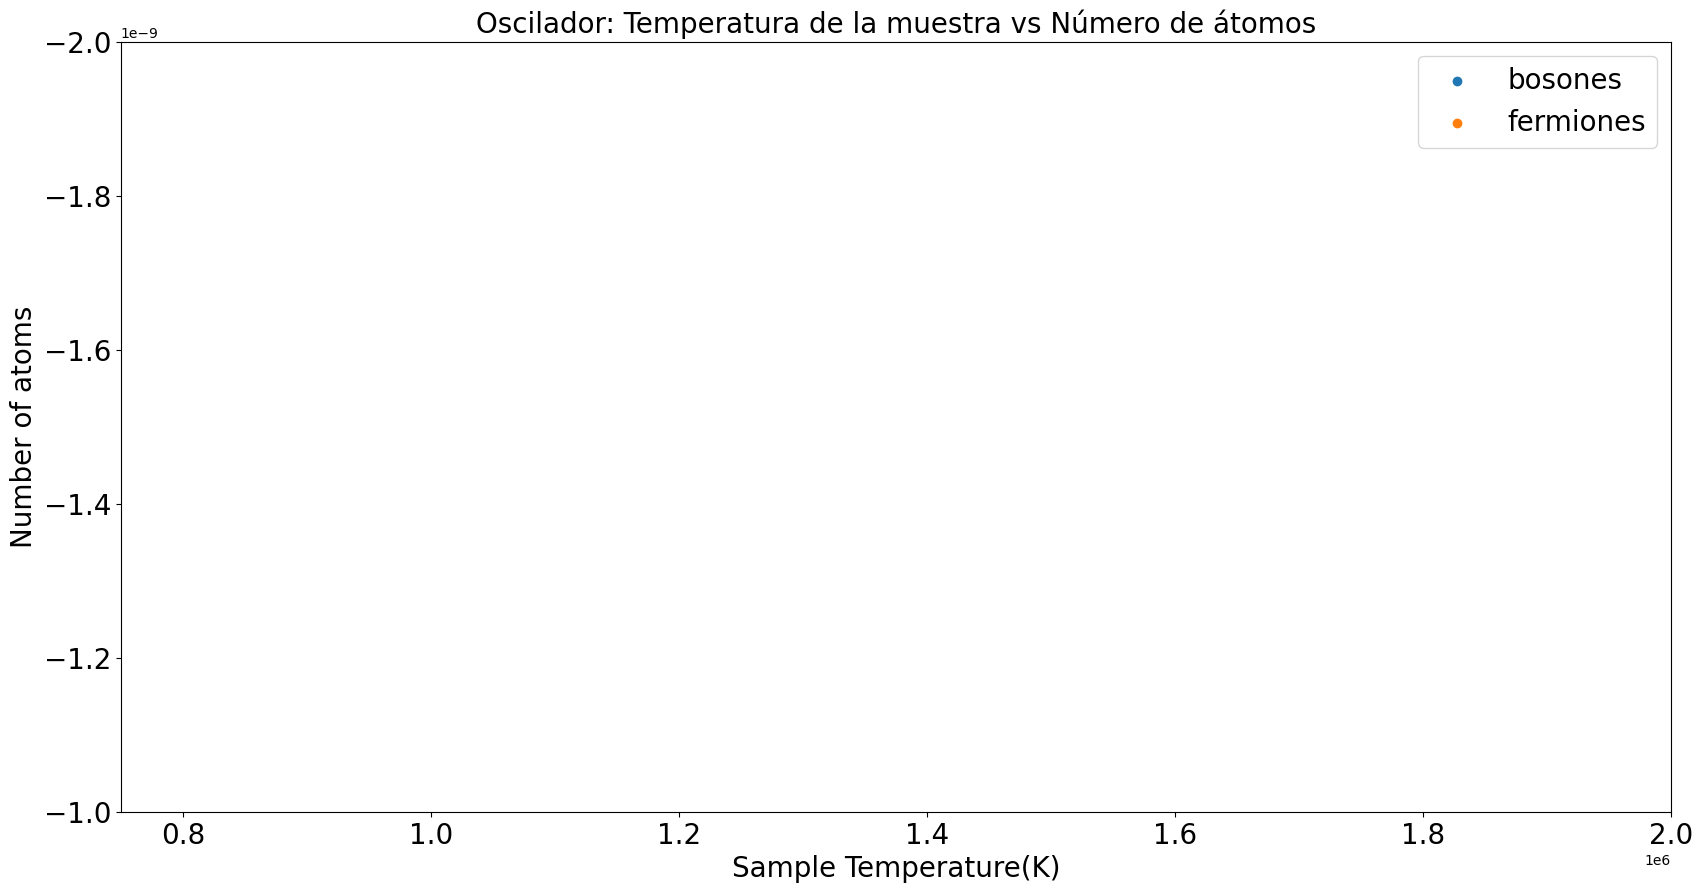

In [68]:
plt.figure(figsize=(20,10))

plt.scatter(evap_cool_b['N'][0:4976],evap_cool_b['Mu'][0:4976],label='bosones')
plt.scatter(evap_cool_f['N'][0:4993],evap_cool_f['Mu'][0:4993], label='fermiones')
#plt.scatter(evap_cool_mb['T'][0:5000],evap_cool_mb['N'][0:5000], label='Maxwell-Boltzmann')
plt.xlim(0.75e6,2e6)
plt.ylim(-0.1e-8,-0.2e-8)
#plt.xscale('log')
#plt.yscale('log')

plt.xlabel('Sample Temperature(K)',fontsize=20)
plt.ylabel('Number of atoms',fontsize=20)

plt.title("Oscilador: Temperatura de la muestra vs Número de átomos", fontsize=20)

plt.legend(fontsize=20)
plt.tick_params(axis='both', labelsize=20)

#plt.savefig('figurita_nueva.jpg')

plt.show()

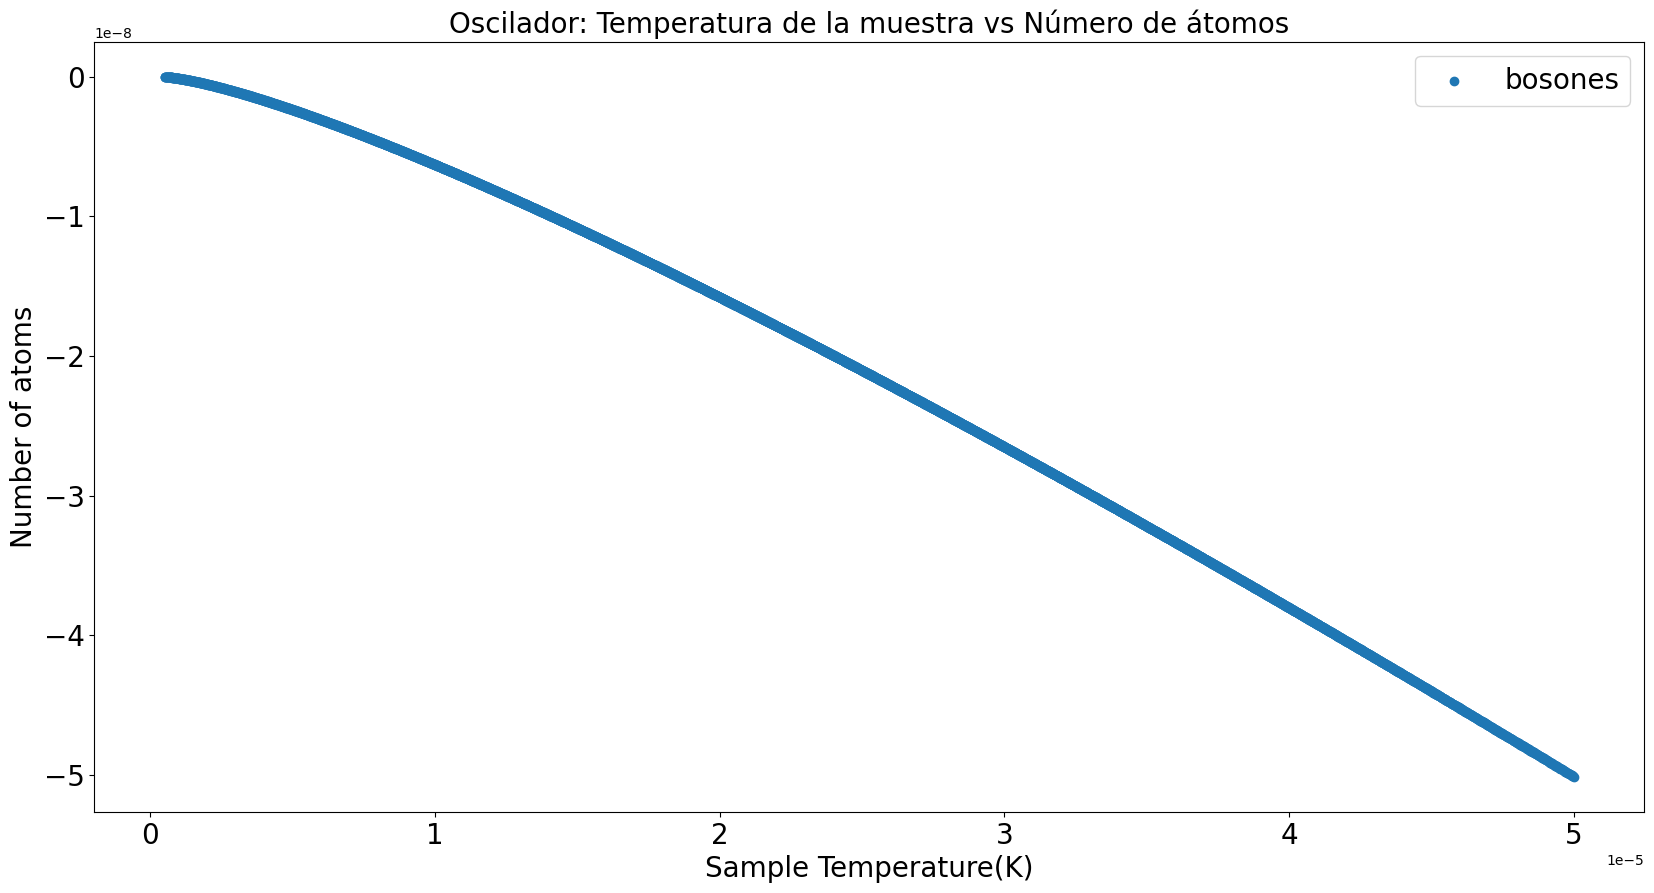

In [26]:
plt.figure(figsize=(20,10))

plt.scatter(evap_cool_b['T'][0:4976],evap_cool_b['Mu'][0:4976],label='bosones')
#plt.scatter(evap_cool_mb['Q'][0:5000],evap_cool_mb['Mu'][0:5000], label='Maxwell-Boltzmann')
#plt.xlim(10e-7,10e-6)
#plt.ylim(0,0.1e7)
#plt.xscale('log')
#plt.yscale('log')

plt.xlabel('Sample Temperature(K)',fontsize=20)
plt.ylabel('Number of atoms',fontsize=20)

plt.title("Oscilador: Temperatura de la muestra vs Número de átomos", fontsize=20)

plt.legend(fontsize=20)
plt.tick_params(axis='both', labelsize=20)

#plt.savefig('figurita_nueva.jpg')

plt.show()

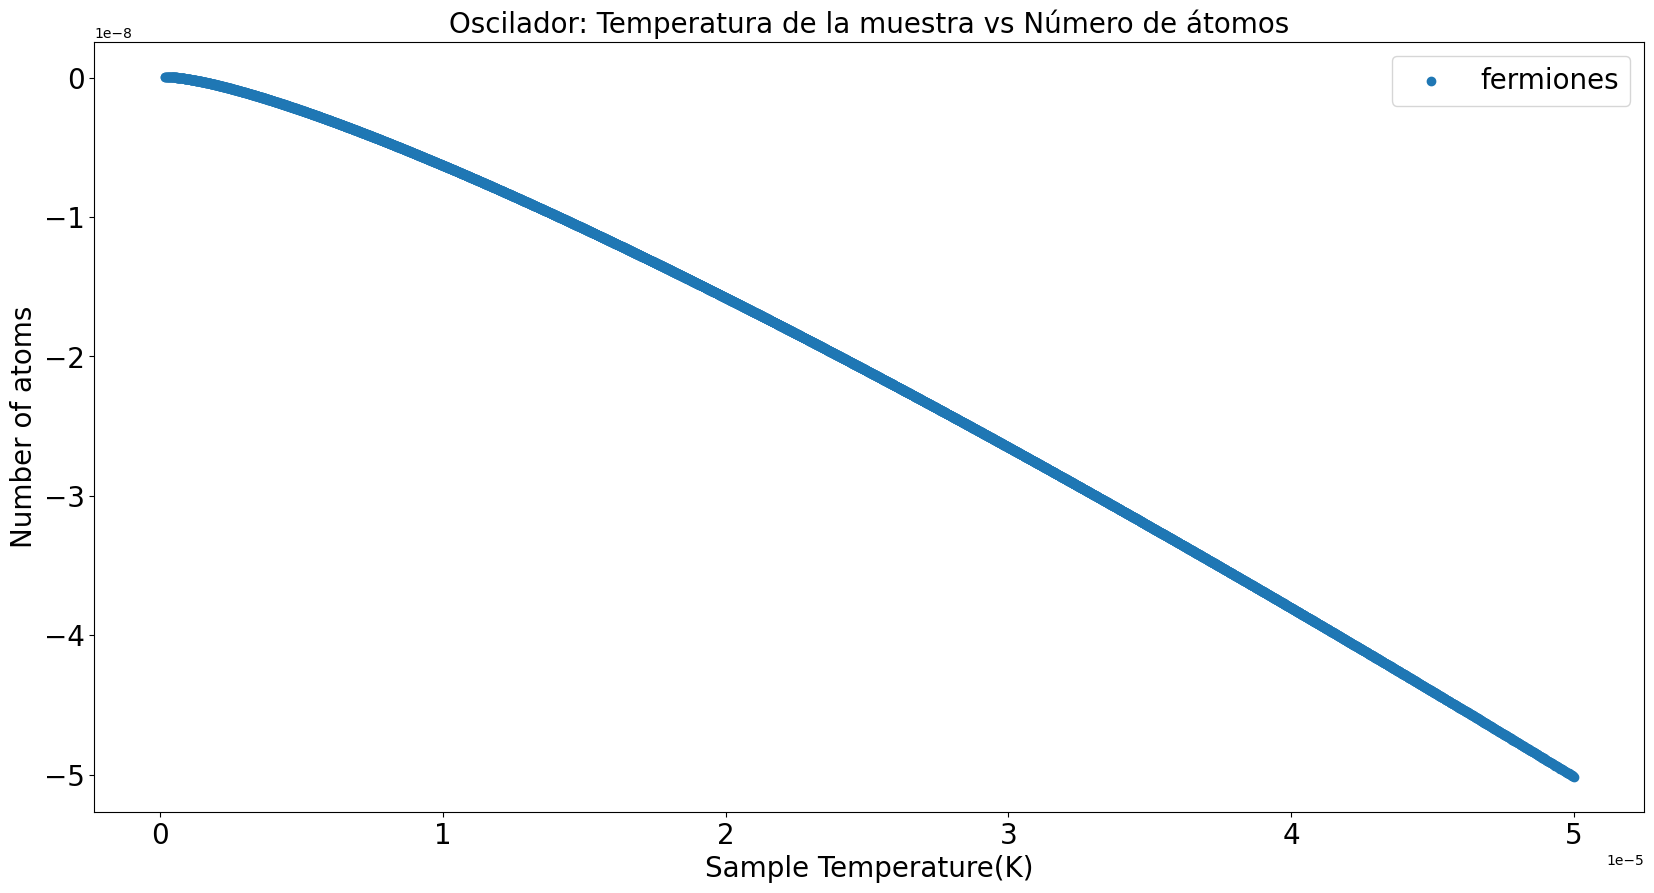

In [27]:
plt.figure(figsize=(20,10))

plt.scatter(evap_cool_f['T'][0:4993],evap_cool_f['Mu'][0:4993], label='fermiones')
#plt.scatter(evap_cool_mb['Q'][0:5000],evap_cool_mb['Mu'][0:5000], label='Maxwell-Boltzmann')
#plt.xlim(10e-7,10e-6)
#plt.ylim(0,0.1e7)
#plt.xscale('log')
#plt.yscale('log')

plt.xlabel('Sample Temperature(K)',fontsize=20)
plt.ylabel('Number of atoms',fontsize=20)

plt.title("Oscilador: Temperatura de la muestra vs Número de átomos", fontsize=20)

plt.legend(fontsize=20)
plt.tick_params(axis='both', labelsize=20)

#plt.savefig('figurita_nueva.jpg')

plt.show()

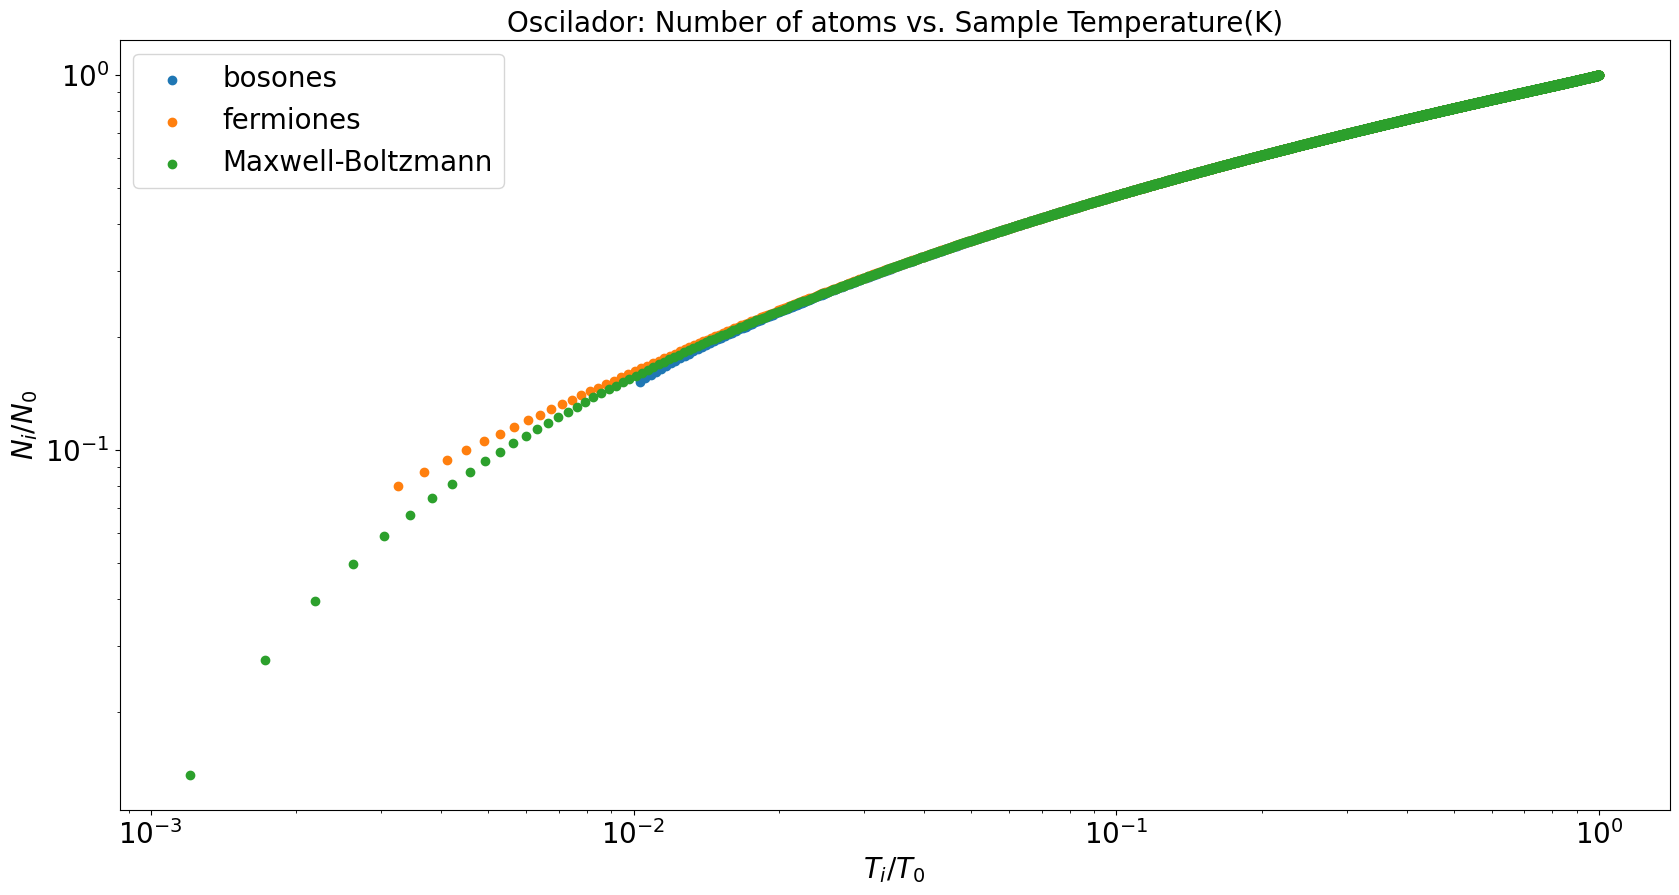

In [28]:
plt.figure(figsize=(20,10))

plt.scatter(evap_cool_b['Tf'][0:4976],evap_cool_b['Nf'][0:4976],label='bosones')
plt.scatter(evap_cool_f['Tf'][0:4993],evap_cool_f['Nf'][0:4993],label='fermiones')
plt.scatter(evap_cool_mb['Tf'],evap_cool_mb['Nf'], label='Maxwell-Boltzmann')
#plt.xlim(0.0,0.030)
#plt.ylim(0.125,0.300)
plt.xscale('log')
plt.yscale('log')

plt.xlabel('$T_i/T_0$',fontsize=20)
plt.ylabel('$N_i/N_0$',fontsize=20)

plt.title("Oscilador: Number of atoms vs. Sample Temperature(K)", fontsize=20)

plt.legend(fontsize=20)
plt.tick_params(axis='both', labelsize=20)

#plt.savefig('figurita_nueva.jpg')

plt.show()

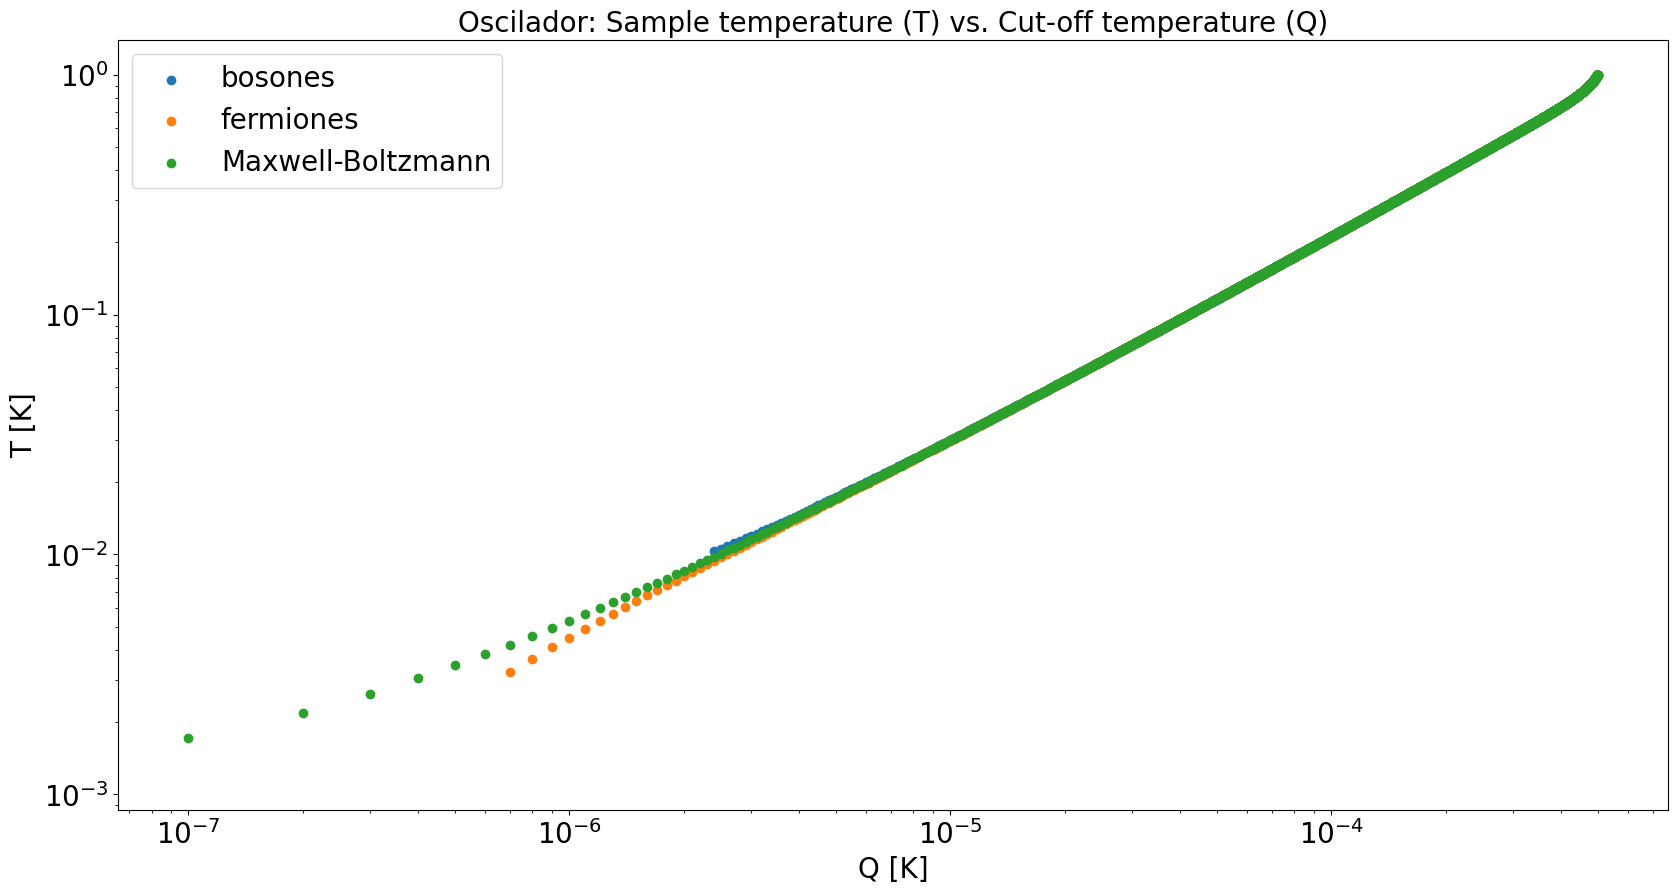

In [29]:
plt.figure(figsize=(20,10))

plt.scatter(evap_cool_b['Q'][0:4976],evap_cool_b['Tf'][0:4976],label='bosones')
plt.scatter(evap_cool_f['Q'][0:4993],evap_cool_f['Tf'][0:4993],label='fermiones')
plt.scatter(evap_cool_mb['Q'][0:5001],evap_cool_mb['Tf'][0:5001], label='Maxwell-Boltzmann')
#plt.xlim(3.5e-7,10e-7)
#plt.ylim(0,10000)
plt.xscale('log')
plt.yscale('log')

plt.xlabel('Q [K]',fontsize=20)
plt.ylabel('T [K]',fontsize=20)

plt.title("Oscilador: Sample temperature (T) vs. Cut-off temperature (Q)", fontsize=20)

plt.legend(fontsize=20)
plt.tick_params(axis='both', labelsize=20)

#plt.savefig('figurita_nueva.jpg')

plt.show()

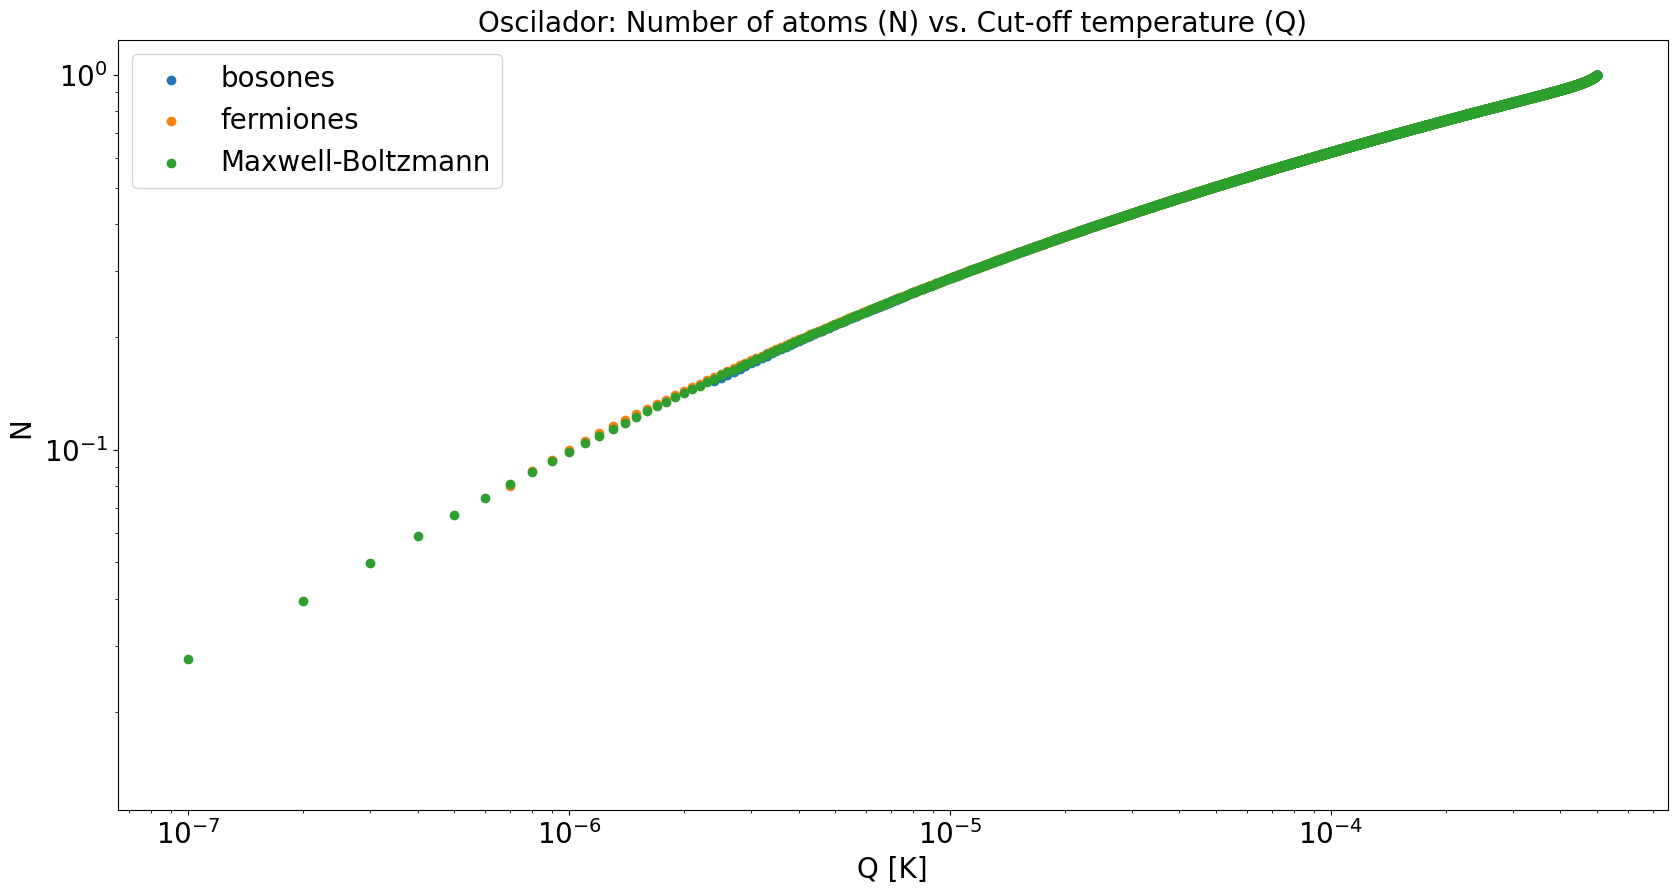

In [30]:
plt.figure(figsize=(20,10))

plt.scatter(evap_cool_b['Q'][0:4976],evap_cool_b['Nf'][0:4976],label='bosones')
plt.scatter(evap_cool_f['Q'][0:4993],evap_cool_f['Nf'][0:4993],label='fermiones')
plt.scatter(evap_cool_mb['Q'][0:5001],evap_cool_mb['Nf'][0:5001], label='Maxwell-Boltzmann')
#plt.xlim(3.5e-7,10e-7)
#plt.ylim(0,10000)
plt.xscale('log')
plt.yscale('log')

plt.xlabel('Q [K]',fontsize=20)
plt.ylabel('N ',fontsize=20)

plt.title("Oscilador: Number of atoms (N) vs. Cut-off temperature (Q)", fontsize=20)

plt.legend(fontsize=20)
plt.tick_params(axis='both', labelsize=20)

#plt.savefig('figurita_nueva.jpg')

plt.show()

Text(0, 0.5, 'Fraction of atoms')

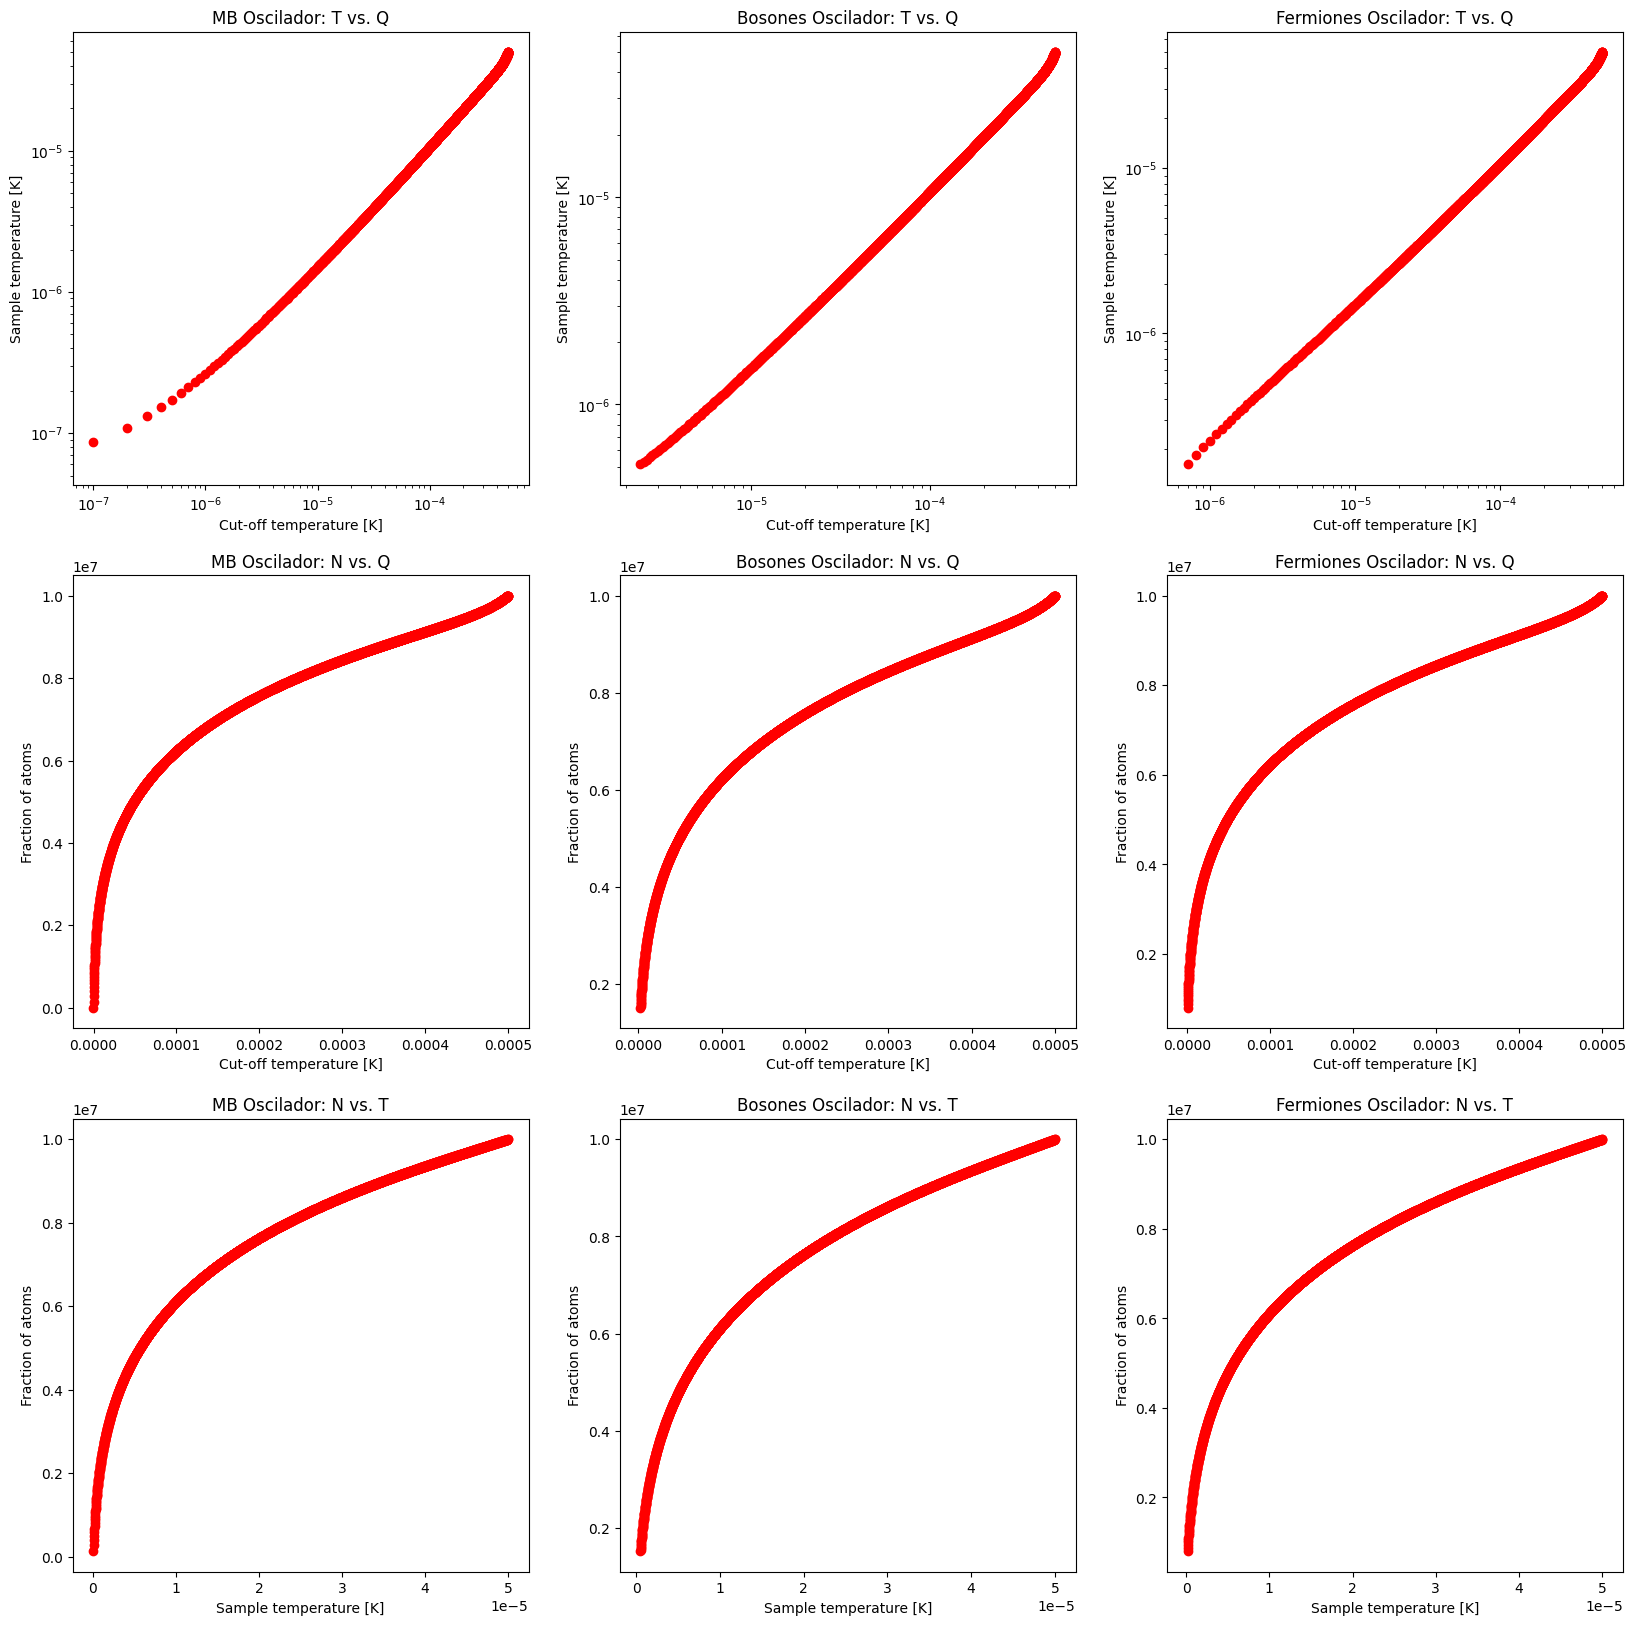

In [31]:
fig,axs=plt.subplots(3,3,figsize=(20,20))
axs[0,0].scatter(evap_cool_mb['Q'][0:5001],evap_cool_mb['T'][0:5001],c='r')
axs[0,0].set_xscale('log')
axs[0,0].set_yscale('log')
axs[0,0].set_title("MB Oscilador: T vs. Q")
axs[0,0].set_xlabel('Cut-off temperature [K]')
axs[0,0].set_ylabel('Sample temperature [K]')

axs[0,1].scatter(evap_cool_b['Q'][0:4976],evap_cool_b['T'][0:4976],c='r')
axs[0,1].set_xscale('log')
axs[0,1].set_yscale('log')
axs[0,1].set_title("Bosones Oscilador: T vs. Q")
axs[0,1].set_xlabel('Cut-off temperature [K]')
axs[0,1].set_ylabel('Sample temperature [K]')

axs[0,2].scatter(evap_cool_f['Q'][0:4993],evap_cool_f['T'][0:4993],c='r')
axs[0,2].set_xscale('log')
axs[0,2].set_yscale('log')
axs[0,2].set_title("Fermiones Oscilador: T vs. Q")
axs[0,2].set_xlabel('Cut-off temperature [K]')
axs[0,2].set_ylabel('Sample temperature [K]')

axs[1,0].scatter(evap_cool_mb['Q'][0:5001],evap_cool_mb['N'][0:5001],c='r')
axs[1,0].set_title("MB Oscilador: N vs. Q")
axs[1,0].set_xlabel('Cut-off temperature [K]')
axs[1,0].set_ylabel('Fraction of atoms')

axs[1,1].scatter(evap_cool_b['Q'][0:4976],evap_cool_b['N'][0:4976],c='r')
axs[1,1].set_title("Bosones Oscilador: N vs. Q")
axs[1,1].set_xlabel('Cut-off temperature [K]')
axs[1,1].set_ylabel('Fraction of atoms')

axs[1,2].scatter(evap_cool_f['Q'][0:4993],evap_cool_f['N'][0:4993],c='r')
axs[1,2].set_title("Fermiones Oscilador: N vs. Q")
axs[1,2].set_xlabel('Cut-off temperature [K]')
axs[1,2].set_ylabel('Fraction of atoms')

axs[2,0].scatter(evap_cool_mb['T'],evap_cool_mb['N'],c='r')
#axs[2,0].set_xscale('log')
#axs[2,0].set_yscale('log')
axs[2,0].set_title("MB Oscilador: N vs. T")
axs[2,0].set_xlabel('Sample temperature [K]')
axs[2,0].set_ylabel('Fraction of atoms')

axs[2,1].scatter(evap_cool_b['T'][0:4976],evap_cool_b['N'][0:4976],c='r')
axs[2,1].set_title("Bosones Oscilador: N vs. T")
axs[2,1].set_xlabel('Sample temperature [K]')
axs[2,1].set_ylabel('Fraction of atoms')

axs[2,2].scatter(evap_cool_f['T'][0:4993],evap_cool_f['N'][0:4993],c='r')
axs[2,2].set_title("Fermiones Oscilador: N vs. T")
axs[2,2].set_xlabel('Sample temperature [K]')
axs[2,2].set_ylabel('Fraction of atoms')

#fig.savefig('evap_cool_oscilador.png')

Text(0, 0.5, 'Sample temperature [K]')

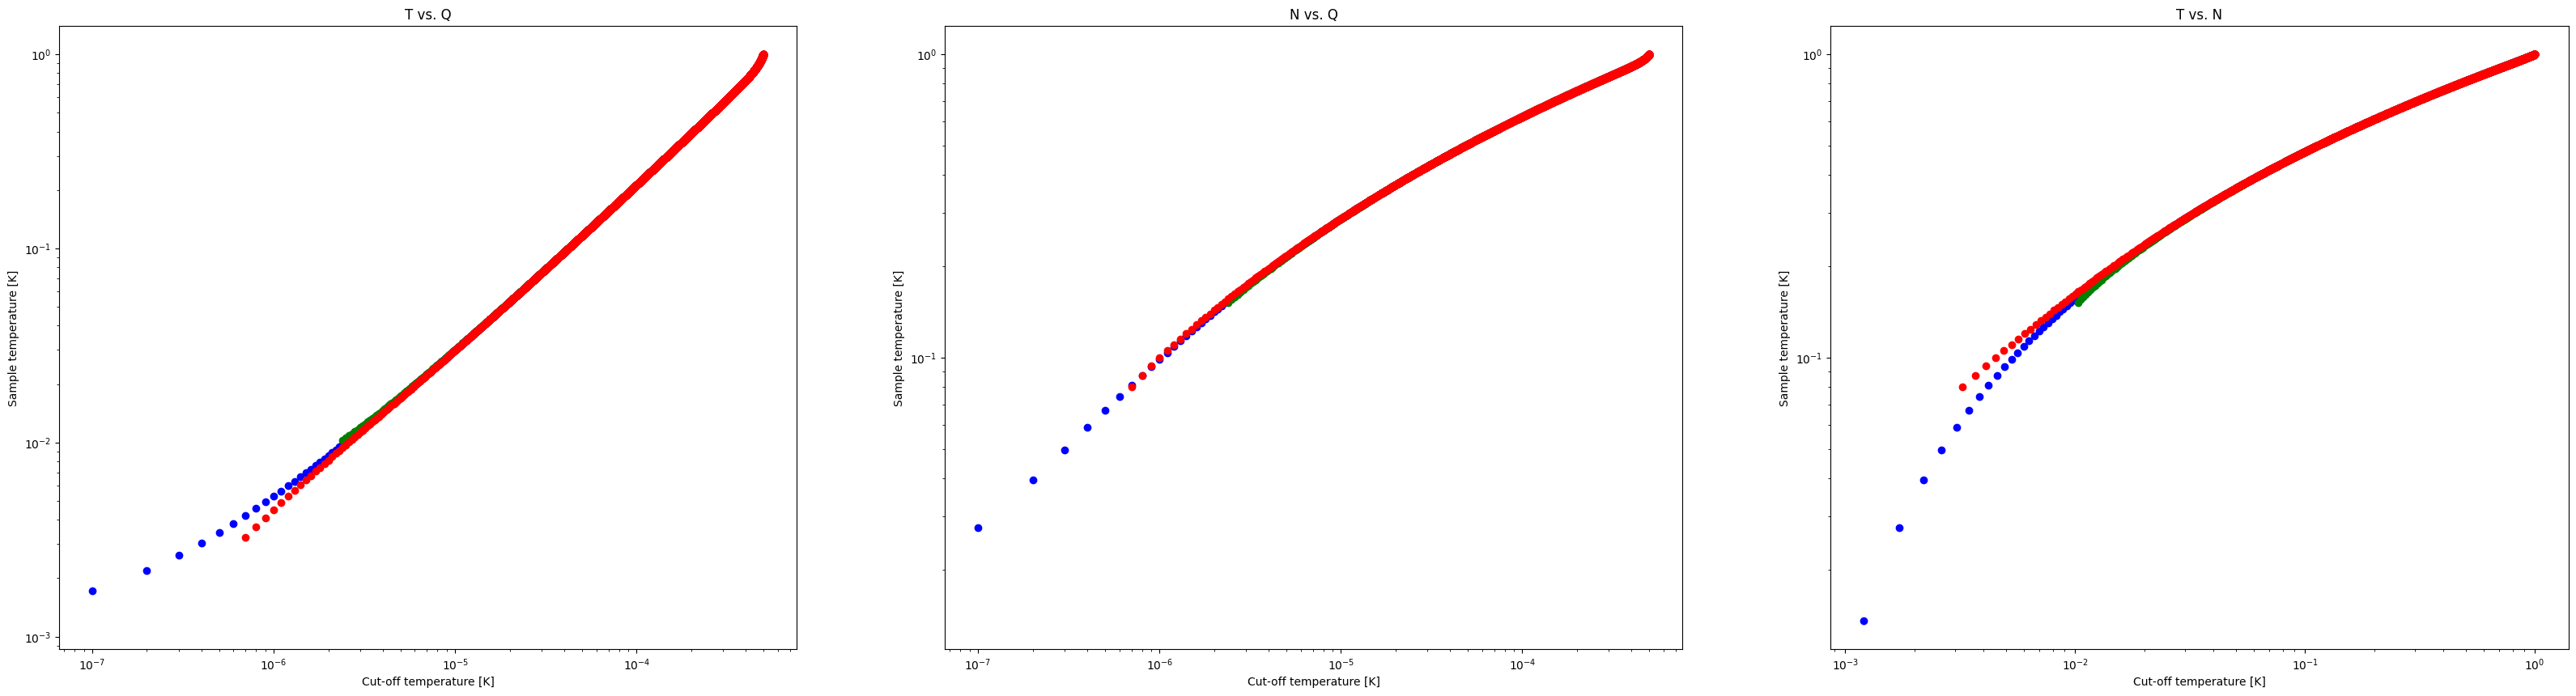

In [32]:
fig,axs=plt.subplots(1,3,figsize=(40,10))
axs[0].scatter(evap_cool_mb['Q'][0:5001],evap_cool_mb['Tf'][0:5001],c='b')
axs[0].scatter(evap_cool_b['Q'][0:4976],evap_cool_b['Tf'][0:4976],c='g')
axs[0].scatter(evap_cool_f['Q'][0:4993],evap_cool_f['Tf'][0:4993],c='r')
axs[0].set_xscale('log')
axs[0].set_yscale('log')
axs[0].set_title("T vs. Q")
axs[0].set_xlabel('Cut-off temperature [K]')
axs[0].set_ylabel('Sample temperature [K]')
#axs[0].legend(fontsize=20)
#axs[0].tick_params(axis='both', labelsize=20)

axs[1].scatter(evap_cool_mb['Q'][0:5001],evap_cool_mb['Nf'][0:5001],c='b')
axs[1].scatter(evap_cool_b['Q'][0:4976],evap_cool_b['Nf'][0:4976],c='g')
axs[1].scatter(evap_cool_f['Q'][0:4993],evap_cool_f['Nf'][0:4993],c='r')
axs[1].set_xscale('log')
axs[1].set_yscale('log')
axs[1].set_title("N vs. Q")
axs[1].set_xlabel('Cut-off temperature [K]')
axs[1].set_ylabel('Sample temperature [K]')
#axs[1].legend(fontsize=20)
#axs[1].tick_params(axis='both', labelsize=20)

axs[2].scatter(evap_cool_mb['Tf'],evap_cool_mb['Nf'],c='b')
axs[2].scatter(evap_cool_b['Tf'][0:4976],evap_cool_b['Nf'][0:4976],c='g')
axs[2].scatter(evap_cool_f['Tf'][0:4993],evap_cool_f['Nf'][0:4993],c='r')
axs[2].set_xscale('log')
axs[2].set_yscale('log')
axs[2].set_title("T vs. N")
axs[2].set_xlabel('Cut-off temperature [K]')
axs[2].set_ylabel('Sample temperature [K]')
#axs[2].legend(fontsize=20)
#axs[2].tick_params(axis='both', labelsize=20)